# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

566

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# setup empty dataframe
weather = pd.DataFrame()
weather['City'] = cities
weather['Cloudiness'] = ''
weather['Country'] = ''
weather['Date'] = ''
weather['Humidity'] = ''
weather['Lat'] = ''
weather['Lng'] = ''
weather['Max Temp'] = ''
weather['Wind Speed'] = ''


weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,,,,,,,,
1,doha,,,,,,,,
2,sentyabrskiy,,,,,,,,
3,vardo,,,,,,,,
4,dikson,,,,,,,,


In [4]:

base_url = "https://api.openweathermap.org/data/2.5/weather?"
param1 = {'appid' :api_keys.api_key,'units':'imperial'}
print('''
    Beginning Data Retrieval     
    -------------------------------
    ''')
n = 0
for index,row in weather.iterrows():
    param1['q'] = row['City']
    data = requests.get(base_url,params=param1).json()
    #pprint(data)
    try:
        print('Processing Record {0} of Set {1} | {2}'.format(n%50,n//50+1,row['City']))
        row['Lat'] = data['coord']['lat']
        row['Lng'] = data['coord']['lon']
        row['Cloudiness'] = data['clouds']['all']
        row['Country'] = data['sys']['country']
        row['Humidity'] = data['main']['humidity']
        row['Max Temp'] = data['main']['temp_max']
        row['Wind Speed'] = data['wind']['speed']
        row['Date'] = data['dt']
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    n+= 1
print('''
-----------------------------
Data Retrieval Complete \n
-----------------------------
''')


    Beginning Data Retrieval     
    -------------------------------
    
Processing Record 0 of Set 1 | vaini
Processing Record 1 of Set 1 | doha
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | vardo
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | eregli
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | fort walton beach
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | yulara
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | khetia
Processing Record 15 of Set 1 | aranos
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | punta arenas
Processi

Processing Record 33 of Set 4 | ontario
Processing Record 34 of Set 4 | talnakh
Processing Record 35 of Set 4 | energeticheskiy
Processing Record 36 of Set 4 | ialibu
Processing Record 37 of Set 4 | santiago de cuba
Processing Record 38 of Set 4 | puerto ayora
Processing Record 39 of Set 4 | maghama
City not found. Skipping...
Processing Record 40 of Set 4 | talca
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | havre-saint-pierre
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | olafsvik
City not found. Skipping...
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | camabatela
Processing Record 47 of Set 4 | nome
Processing Record 48 of Set 4 | wukari
Processing Record 49 of Set 4 | darnah
Processing Record 0 of Set 5 | torbay
Processing Record 1 of Set 5 | pontian kecil
Processing Record 2 of Set 5 | tieling
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | p

Processing Record 15 of Set 8 | medea
Processing Record 16 of Set 8 | castro
Processing Record 17 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 8 | vargashi
Processing Record 19 of Set 8 | quesnel
Processing Record 20 of Set 8 | muroran
Processing Record 21 of Set 8 | miyako
Processing Record 22 of Set 8 | vung tau
Processing Record 23 of Set 8 | wuwei
Processing Record 24 of Set 8 | san andres
Processing Record 25 of Set 8 | santa barbara
Processing Record 26 of Set 8 | baie-comeau
Processing Record 27 of Set 8 | prince rupert
Processing Record 28 of Set 8 | kalmunai
Processing Record 29 of Set 8 | dali
Processing Record 30 of Set 8 | nova olinda do norte
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | liverpool
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | baykit
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | harwich
Processing Record 38 

Processing Record 49 of Set 11 | houma
Processing Record 0 of Set 12 | sabang
Processing Record 1 of Set 12 | bahia blanca
Processing Record 2 of Set 12 | kijang
Processing Record 3 of Set 12 | olavarria
Processing Record 4 of Set 12 | christchurch
Processing Record 5 of Set 12 | tari
Processing Record 6 of Set 12 | hamada
Processing Record 7 of Set 12 | cavalcante
Processing Record 8 of Set 12 | boende
Processing Record 9 of Set 12 | san bartolome de tirajana
City not found. Skipping...
Processing Record 10 of Set 12 | liepaja
Processing Record 11 of Set 12 | kutum
Processing Record 12 of Set 12 | shira
Processing Record 13 of Set 12 | meyungs
City not found. Skipping...
Processing Record 14 of Set 12 | santa marinella
Processing Record 15 of Set 12 | ust-kamchatsk
City not found. Skipping...

-----------------------------
Data Retrieval Complete 

-----------------------------



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,0,IN,1547172000,71,15.34,74.49,55.4,4.05
1,doha,0,QA,1547175600,63,25.29,51.53,60.8,12.75
2,sentyabrskiy,,,,,,,,
3,vardo,90,US,1547176500,50,39.62,-77.74,30.2,20.8
4,dikson,24,RU,1547177063,100,73.51,80.55,-19.02,5.73


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


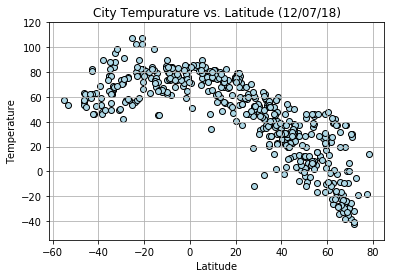

In [6]:
full_weather = weather.loc[weather['Cloudiness'] != '',]
full_weather[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']] = full_weather[['Cloudiness','Humidity','Lat','Lng','Max Temp','Wind Speed']].astype('float')

plt.scatter(full_weather['Lat'],full_weather['Max Temp'],facecolor = 'lightblue',edgecolor = 'black')
plt.title("City Tempurature vs. Latitude (12/07/18)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.ylim([-55, 120])
plt.grid('On')




#### Latitude vs. Humidity Plot

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


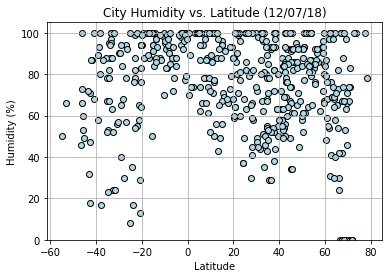

In [7]:
plt.scatter(full_weather['Lat'],full_weather['Humidity'],facecolor = 'lightblue',edgecolor = 'black')
plt.title("City Humidity vs. Latitude (12/07/18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim([0,105])
plt.grid('On')


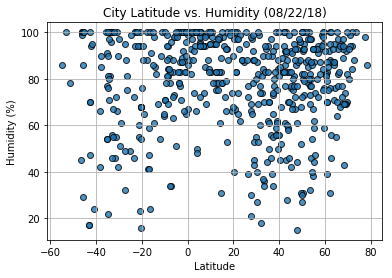

#### Latitude vs. Cloudiness Plot

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


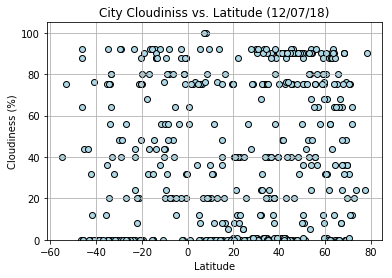

In [8]:
plt.scatter(full_weather['Lat'],full_weather['Cloudiness'],facecolor = 'lightblue',edgecolor = 'black')
plt.title("City Cloudiniss vs. Latitude (12/07/18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim([0,105])
plt.grid('On')

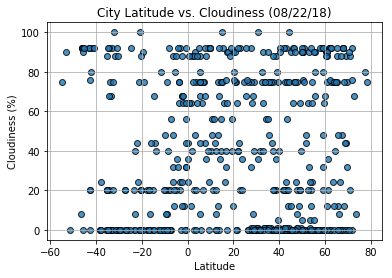

#### Latitude vs. Wind Speed Plot

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


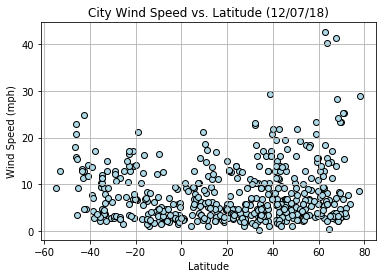

In [9]:
plt.scatter(full_weather['Lat'],full_weather['Wind Speed'],facecolor = 'lightblue',edgecolor = 'black')
plt.title("City Wind Speed vs. Latitude (12/07/18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
#plt.ylim([0,105])
plt.grid('On')

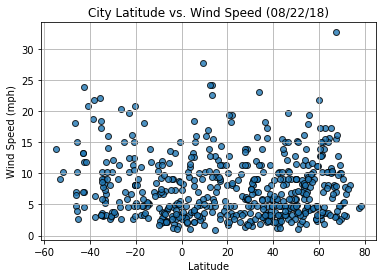